In [64]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce   
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

### preprocessing
[click](https://scikit-learn.org/stable/modules/preprocessing.html)

In [65]:
import warnings
warnings.filterwarnings('ignore')

train_dir='E:/crash_prediction/train.csv'
test_dir='E:/crash_prediction/test.csv'

col=['Severity','Safety_Score','days','complaints','Control_Metric','turbulence','temp','code','Max_Elevation','Violations','weather','id']
df = pd.read_csv(train_dir)
df_test= pd.read_csv(test_dir)

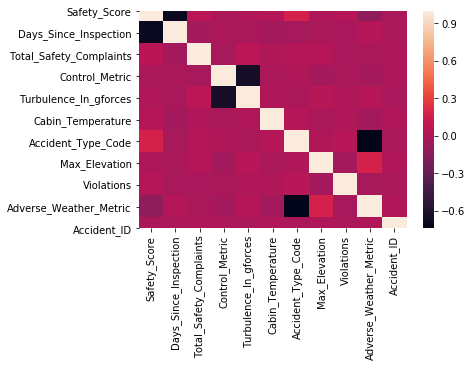

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [67]:
df.columns=col
df_test.columns=col[1:]

df_test.head(5)
train = df.drop( ['id'] ,axis=1)
test = df_test.drop( ['id'] ,axis=1)


In [68]:
train.head(5)

,Severity,Safety_Score,days,complaints,Control_Metric,turbulence,temp,code,Max_Elevation,Violations,weather
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [69]:
from sklearn.model_selection import train_test_split

X = train.drop(['Severity'], axis = 1)
Y = train['Severity']

X_Train1, X_Test1, Y_Train1, Y_Test1 = train_test_split(X, Y, test_size = 0.20, random_state = 10)

## Selecting K best feature

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X_Train1, Y_Train1)

In [71]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [72]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
featureScores

,features,Score
0,Safety_Score,6716.516923
1,days,17.303316
2,complaints,10.166714
3,Control_Metric,804.741519
4,turbulence,4.990559
5,temp,0.331710
6,code,508.699967
7,Max_Elevation,31117.858480
8,Violations,23.314106
9,weather,121.134368


In [73]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         features         Score
7   Max_Elevation  31117.858480
0    Safety_Score   6716.516923
3  Control_Metric    804.741519
6            code    508.699967
9         weather    121.134368
8      Violations     23.314106
1            days     17.303316
2      complaints     10.166714
4      turbulence      4.990559
5            temp      0.331710


In [74]:
# STANDARDIZATION OF DATA

train['Safety_Score']=(train['Safety_Score']-train['Safety_Score'].mean())/train['Safety_Score'].std()
test['Safety_Score']=(test['Safety_Score']-test['Safety_Score'].mean())/test['Safety_Score'].std()

train['Control_Metric']=(train['Control_Metric']-train['Control_Metric'].mean())/train['Control_Metric'].std()
test['Control_Metric']=(test['Control_Metric']-test['Control_Metric'].mean())/test['Control_Metric'].std()

train['Max_Elevation']=(train['Max_Elevation']-train['Max_Elevation'].mean())/train['Max_Elevation'].std()
test['Max_Elevation']=(test['Max_Elevation']-test['Max_Elevation'].mean())/test['Max_Elevation'].std()

train['weather']=(train['weather']-train['weather'].mean())/train['weather'].std()
test['weather']=(test['weather']-test['weather'].mean())/test['weather'].std()

train['days']=(train['days']-train['days'].mean())/train['days'].std()
test['days']=(test['days']-test['days'].mean())/test['days'].std()

train['complaints']=(train['complaints']-train['complaints'].mean())/train['complaints'].std()
test['complaints']=(test['complaints']-test['complaints'].mean())/test['complaints'].std()

train['code']=(train['code']-train['code'].mean())/train['code'].std()
test['code']=(test['code']-test['code'].mean())/test['code'].std()

train['Violations']=(train['Violations']-train['Violations'].mean())/train['Violations'].std()
test['Violations']=(test['Violations']-test['Violations'].mean())/test['Violations'].std()

train['turbulence']=(train['turbulence']-train['turbulence'].mean())/train['turbulence'].std()
test['turbulence']=(test['turbulence']-test['turbulence'].mean())/test['turbulence'].std()

train['temp']=(train['temp']-train['temp'].mean())/train['temp'].std()
test['temp']=(test['temp']-test['temp'].mean())/test['temp'].std()

### PCA
[click](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [75]:
from sklearn.model_selection import train_test_split

X = train.drop(['Severity'], axis = 1)
Y = train['Severity']

#from sklearn.decomposition import PCA
#pca = PCA(svd_solver='auto',n_components =5)
#X_pca = pca.fit_transform(X)

#test_final=test.drop(['temp'], axis = 1)
#Test_pca=pca.fit_transform(test_final)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [76]:
from sklearn.linear_model import RidgeClassifier
Ridge_classifier = RidgeClassifier(alpha=10,solver='svd').fit(X_Train, Y_Train)
predictions =Ridge_classifier.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[506  93  16   5]
 [ 39 355  36  63]
 [133  83  60  36]
 [301  82  47 145]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.52      0.82      0.63       620
              Minor_Damage_And_Injuries       0.58      0.72      0.64       493
      Significant_Damage_And_Fatalities       0.38      0.19      0.25       312
Significant_Damage_And_Serious_Injuries       0.58      0.25      0.35       575

                               accuracy                           0.53      2000
                              macro avg       0.51      0.50      0.47      2000
                           weighted avg       0.53      0.53      0.50      2000



In [77]:
from sklearn.linear_model import RidgeClassifierCV
Ridge_cv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1,10]).fit(X_Train, Y_Train)
predictions1 =Ridge_cv.predict(X_Test)
print(confusion_matrix(Y_Test,predictions1))
print(classification_report(Y_Test,predictions1))

[[506  93  16   5]
 [ 39 355  36  63]
 [133  83  60  36]
 [301  82  47 145]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.52      0.82      0.63       620
              Minor_Damage_And_Injuries       0.58      0.72      0.64       493
      Significant_Damage_And_Fatalities       0.38      0.19      0.25       312
Significant_Damage_And_Serious_Injuries       0.58      0.25      0.35       575

                               accuracy                           0.53      2000
                              macro avg       0.51      0.50      0.47      2000
                           weighted avg       0.53      0.53      0.50      2000



In [78]:
from sklearn.linear_model import LogisticRegression
trainedmodel = LogisticRegression(penalty='l2',C=1.0,solver='sag').fit(X_Train,Y_Train)
predictions6 =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions6))
print(classification_report(Y_Test,predictions6))

[[504  88  21   7]
 [  1 326  55 111]
 [129  73  75  35]
 [ 62  74  60 379]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.72      0.81      0.77       620
              Minor_Damage_And_Injuries       0.58      0.66      0.62       493
      Significant_Damage_And_Fatalities       0.36      0.24      0.29       312
Significant_Damage_And_Serious_Injuries       0.71      0.66      0.68       575

                               accuracy                           0.64      2000
                              macro avg       0.59      0.59      0.59      2000
                           weighted avg       0.63      0.64      0.63      2000



In [79]:
from sklearn.linear_model import LogisticRegressionCV
logisticRegressionCV = LogisticRegression().fit(X_Train,Y_Train)
predictions7 =logisticRegressionCV.predict(X_Test)
print(confusion_matrix(Y_Test,predictions7))
print(classification_report(Y_Test,predictions7))

[[504  88  21   7]
 [  1 326  55 111]
 [129  73  75  35]
 [ 62  73  60 380]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.72      0.81      0.77       620
              Minor_Damage_And_Injuries       0.58      0.66      0.62       493
      Significant_Damage_And_Fatalities       0.36      0.24      0.29       312
Significant_Damage_And_Serious_Injuries       0.71      0.66      0.69       575

                               accuracy                           0.64      2000
                              macro avg       0.59      0.59      0.59      2000
                           weighted avg       0.63      0.64      0.63      2000



In [80]:
from sklearn import linear_model
sgd_classifier = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
sgd_classifier.fit(X_Train,Y_Train)
predictions8 =sgd_classifier.predict(X_Test)
print(confusion_matrix(Y_Test,predictions8))
print(classification_report(Y_Test,predictions8))

[[503  90  17  10]
 [  1 361  66  65]
 [128  89  63  32]
 [ 85 209  87 194]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.70      0.81      0.75       620
              Minor_Damage_And_Injuries       0.48      0.73      0.58       493
      Significant_Damage_And_Fatalities       0.27      0.20      0.23       312
Significant_Damage_And_Serious_Injuries       0.64      0.34      0.44       575

                               accuracy                           0.56      2000
                              macro avg       0.52      0.52      0.50      2000
                           weighted avg       0.56      0.56      0.54      2000



In [81]:
from sklearn.linear_model import Perceptron
percep= Perceptron(tol=1e-2, random_state=0)
percep.fit(X_Train,Y_Train)
predictions9 =sgd_classifier.predict(X_Test)
print(confusion_matrix(Y_Test,predictions9))
print(classification_report(Y_Test,predictions9))

[[503  90  17  10]
 [  1 361  66  65]
 [128  89  63  32]
 [ 85 209  87 194]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.70      0.81      0.75       620
              Minor_Damage_And_Injuries       0.48      0.73      0.58       493
      Significant_Damage_And_Fatalities       0.27      0.20      0.23       312
Significant_Damage_And_Serious_Injuries       0.64      0.34      0.44       575

                               accuracy                           0.56      2000
                              macro avg       0.52      0.52      0.50      2000
                           weighted avg       0.56      0.56      0.54      2000



In [89]:
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto',C=10,kernel='rbf',decision_function_shape='ovo').fit(X_Train,Y_Train)
predictions10 =svc_clf.predict(X_Test)
print(confusion_matrix(Y_Test,predictions10))
print(classification_report(Y_Test,predictions10))

[[561  21  20  18]
 [ 18 449   2  24]
 [ 22   7 281   2]
 [ 27  20   8 520]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.89      0.90      0.90       620
              Minor_Damage_And_Injuries       0.90      0.91      0.91       493
      Significant_Damage_And_Fatalities       0.90      0.90      0.90       312
Significant_Damage_And_Serious_Injuries       0.92      0.90      0.91       575

                               accuracy                           0.91      2000
                              macro avg       0.91      0.91      0.91      2000
                           weighted avg       0.91      0.91      0.91      2000



In [20]:
#param_grid = [
 # {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 #]
#grid_search0=GridSearchCV(svc_clf,param_grid=param_grid)
#grid_search0.fit(X_Train, Y_Train)

In [21]:
#grid_search0.best_estimator_

In [22]:
#svc_clf = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
 #   decision_function_shape='ovr', degree=3, gamma=0.4, kernel='sigmoid',
  #  max_iter=-1, probability=False, random_state=None, shrinking=True,
   # tol=0.001, verbose=False).fit(X_Train,Y_Train)

In [23]:
#prediction_svc = svc_clf.predict(X_Test)
#print(confusion_matrix(Y_Test,prediction_svc))
#print(classification_report(Y_Test,prediction_svc))

In [93]:
from sklearn import svm
trainedsvm = svm.LinearSVC(C=1,penalty='l2').fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

[[506  92  17   5]
 [ 23 362  40  68]
 [132  80  62  38]
 [234  90  60 191]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.57      0.82      0.67       620
              Minor_Damage_And_Injuries       0.58      0.73      0.65       493
      Significant_Damage_And_Fatalities       0.35      0.20      0.25       312
Significant_Damage_And_Serious_Injuries       0.63      0.33      0.44       575

                               accuracy                           0.56      2000
                              macro avg       0.53      0.52      0.50      2000
                           weighted avg       0.55      0.56      0.53      2000



In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4,algorithm='auto',leaf_size=70)
knn.fit(X_Train, Y_Train)
Y_pred = knn.predict(X_Test)
print(confusion_matrix(Y_Test,Y_pred))
print(classification_report(Y_Test,Y_pred))

[[492  48  24  56]
 [ 53 359  28  53]
 [ 42  57 205   8]
 [102  77  13 383]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.71      0.79      0.75       620
              Minor_Damage_And_Injuries       0.66      0.73      0.69       493
      Significant_Damage_And_Fatalities       0.76      0.66      0.70       312
Significant_Damage_And_Serious_Injuries       0.77      0.67      0.71       575

                               accuracy                           0.72      2000
                              macro avg       0.73      0.71      0.72      2000
                           weighted avg       0.72      0.72      0.72      2000



In [101]:
from sklearn.naive_bayes import GaussianNB
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

[[308  69  37 206]
 [ 95 217  44 137]
 [ 76  35  73 128]
 [120  51  53 351]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.51      0.50      0.51       620
              Minor_Damage_And_Injuries       0.58      0.44      0.50       493
      Significant_Damage_And_Fatalities       0.35      0.23      0.28       312
Significant_Damage_And_Serious_Injuries       0.43      0.61      0.50       575

                               accuracy                           0.47      2000
                              macro avg       0.47      0.45      0.45      2000
                           weighted avg       0.48      0.47      0.47      2000



In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=10,max_depth=2)
DT_clf.fit(X_Train, Y_Train)
predictionDT = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionDT))
print(classification_report(Y_Test,predictionDT))

[[308  69  37 206]
 [ 95 217  44 137]
 [ 76  35  73 128]
 [120  51  53 351]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.51      0.50      0.51       620
              Minor_Damage_And_Injuries       0.58      0.44      0.50       493
      Significant_Damage_And_Fatalities       0.35      0.23      0.28       312
Significant_Damage_And_Serious_Injuries       0.43      0.61      0.50       575

                               accuracy                           0.47      2000
                              macro avg       0.47      0.45      0.45      2000
                           weighted avg       0.48      0.47      0.47      2000



In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=1000, learning_rate = learning_rate, max_depth = 9, random_state = 0)
    gb.fit(X_Train, Y_Train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_Train, Y_Train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_Test, Y_Test)))
    print()

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.959

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.963

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.964

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.962

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.956

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.954



In [110]:
gb = GradientBoostingClassifier(n_estimators=1100, learning_rate = 0.25, max_depth =7 , random_state = 0)
gb.fit(X_Train, Y_Train)
predictions = gb.predict(X_Test)

print("Confusion Matrix:")
print(confusion_matrix(Y_Test, predictions))
print()
print("Classification Report")
print(classification_report(Y_Test, predictions))

Confusion Matrix:
[[597   7  12   4]
 [  7 477   2   7]
 [  5   1 304   2]
 [  7  14   1 553]]

Classification Report
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.97      0.96      0.97       620
              Minor_Damage_And_Injuries       0.96      0.97      0.96       493
      Significant_Damage_And_Fatalities       0.95      0.97      0.96       312
Significant_Damage_And_Serious_Injuries       0.98      0.96      0.97       575

                               accuracy                           0.97      2000
                              macro avg       0.96      0.97      0.97      2000
                           weighted avg       0.97      0.97      0.97      2000



In [114]:
prediction_gb_final=gb.predict(test)
submission = pd.DataFrame({
        "Accident_ID": df_test["id"],
        "Severity": prediction_gb_final
    })
submission.to_csv('E:/crash_prediction/s11.csv', index=False)

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(gb,max_samples=0.7,random_state=0).fit(X_Train, Y_Train)
prediction_bag = bagging.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_bag))
print(classification_report(Y_Test,prediction_bag))

[[595   5  15   5]
 [  9 477   4   3]
 [  1   2 304   5]
 [ 14  15   3 543]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.96      0.96       620
              Minor_Damage_And_Injuries       0.96      0.97      0.96       493
      Significant_Damage_And_Fatalities       0.93      0.97      0.95       312
Significant_Damage_And_Serious_Injuries       0.98      0.94      0.96       575

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [116]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier().fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[579  16  13  12]
 [ 14 459  12   8]
 [  6  14 284   8]
 [ 20  26   1 528]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.94      0.93      0.93       620
              Minor_Damage_And_Injuries       0.89      0.93      0.91       493
      Significant_Damage_And_Fatalities       0.92      0.91      0.91       312
Significant_Damage_And_Serious_Injuries       0.95      0.92      0.93       575

                               accuracy                           0.93      2000
                              macro avg       0.92      0.92      0.92      2000
                           weighted avg       0.93      0.93      0.93      2000



In [117]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params1={
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "n_estimators"     : [100,300,500,700,800,1000],
 "max_features"     : [4,6,8,10]
}
random_search0=RandomizedSearchCV(trainedforest,param_distributions=params1,n_iter=5,n_jobs=-1,cv=5,verbose=3)
random_search0.fit(X_Train, Y_Train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:   16.6s remaining:   21.1s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   26.8s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   35.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [118]:
random_search0.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
trainedforest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[595   6  13   6]
 [ 15 467   6   5]
 [  5   6 295   6]
 [ 14  24   0 537]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.95      0.96      0.95       620
              Minor_Damage_And_Injuries       0.93      0.95      0.94       493
      Significant_Damage_And_Fatalities       0.94      0.95      0.94       312
Significant_Damage_And_Serious_Injuries       0.97      0.93      0.95       575

                               accuracy                           0.95      2000
                              macro avg       0.95      0.95      0.95      2000
                           weighted avg       0.95      0.95      0.95      2000



In [122]:
from sklearn.ensemble import ExtraTreesClassifier
clf_extra_tree = ExtraTreesClassifier(n_estimators=1000,random_state=0,max_features=10,max_depth=10)
clf_extra_tree.fit(X_Train,Y_Train)
predictionforest_extra = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest_extra))
print(classification_report(Y_Test,predictionforest_extra))

[[595   6  13   6]
 [ 15 467   6   5]
 [  5   6 295   6]
 [ 14  24   0 537]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.95      0.96      0.95       620
              Minor_Damage_And_Injuries       0.93      0.95      0.94       493
      Significant_Damage_And_Fatalities       0.94      0.95      0.94       312
Significant_Damage_And_Serious_Injuries       0.97      0.93      0.95       575

                               accuracy                           0.95      2000
                              macro avg       0.95      0.95      0.95      2000
                           weighted avg       0.95      0.95      0.95      2000



In [147]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf_ada.fit(X_Train,Y_Train)
prediction_ada = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_ada))
print(classification_report(Y_Test,prediction_ada))

[[595   6  13   6]
 [ 15 467   6   5]
 [  5   6 295   6]
 [ 14  24   0 537]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.95      0.96      0.95       620
              Minor_Damage_And_Injuries       0.93      0.95      0.94       493
      Significant_Damage_And_Fatalities       0.94      0.95      0.94       312
Significant_Damage_And_Serious_Injuries       0.97      0.93      0.95       575

                               accuracy                           0.95      2000
                              macro avg       0.95      0.95      0.95      2000
                           weighted avg       0.95      0.95      0.95      2000



In [124]:
from sklearn.multiclass import OneVsRestClassifier
clf_ovr = OneVsRestClassifier(gb).fit(X_Train,Y_Train)
prediction_ovr = clf_ovr.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_ovr))
print(classification_report(Y_Test,prediction_ovr))

[[593   8  15   4]
 [  7 480   1   5]
 [  4   1 304   3]
 [  9  14   3 549]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.97      0.96      0.96       620
              Minor_Damage_And_Injuries       0.95      0.97      0.96       493
      Significant_Damage_And_Fatalities       0.94      0.97      0.96       312
Significant_Damage_And_Serious_Injuries       0.98      0.95      0.97       575

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [ ]:
#prediction_final=clf_ovr.predict(test_final)
#submission = pd.DataFrame({
 #       "Accident_ID": df_test["id"],
  #      "Severity": prediction_final
   # })
#submission.to_csv('E:/crash_prediction/s7.csv', index=False)

In [125]:
from sklearn.multiclass import OneVsOneClassifier
clf_ovo = OneVsOneClassifier(gb).fit(X_Train,Y_Train)
prediction_ovo = clf_ovo.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_ovo))
print(classification_report(Y_Test,prediction_ovo))

[[595   7  15   3]
 [  7 480   1   5]
 [  4   3 298   7]
 [  9  13   1 552]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.97      0.96      0.96       620
              Minor_Damage_And_Injuries       0.95      0.97      0.96       493
      Significant_Damage_And_Fatalities       0.95      0.96      0.95       312
Significant_Damage_And_Serious_Injuries       0.97      0.96      0.97       575

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [126]:
from sklearn.multiclass import OutputCodeClassifier
clf_occ = OutputCodeClassifier(gb).fit(X_Train,Y_Train)
prediction_occ = clf_occ.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_occ))
print(classification_report(Y_Test,prediction_occ))

[[591   7  15   7]
 [  6 480   1   6]
 [  5   1 301   5]
 [  7  13   1 554]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.97      0.95      0.96       620
              Minor_Damage_And_Injuries       0.96      0.97      0.97       493
      Significant_Damage_And_Fatalities       0.95      0.96      0.96       312
Significant_Damage_And_Serious_Injuries       0.97      0.96      0.97       575

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [127]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='sgd', alpha=1e-3,hidden_layer_sizes=(512,256,128,32,4), random_state=10)
clf_mlp.fit(X_Train,Y_Train)
prediction_mlp = clf_mlp.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_mlp))
print(classification_report(Y_Test,prediction_mlp))

[[582   8  18  12]
 [ 16 464   1  12]
 [ 12   3 291   6]
 [ 12  26   7 530]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.94      0.94      0.94       620
              Minor_Damage_And_Injuries       0.93      0.94      0.93       493
      Significant_Damage_And_Fatalities       0.92      0.93      0.93       312
Significant_Damage_And_Serious_Injuries       0.95      0.92      0.93       575

                               accuracy                           0.93      2000
                              macro avg       0.93      0.93      0.93      2000
                           weighted avg       0.93      0.93      0.93      2000



In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
trainedlda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto').fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

[[504  87  24   5]
 [  3 340  56  94]
 [130  70  89  23]
 [ 86  74  57 358]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.70      0.81      0.75       620
              Minor_Damage_And_Injuries       0.60      0.69      0.64       493
      Significant_Damage_And_Fatalities       0.39      0.29      0.33       312
Significant_Damage_And_Serious_Injuries       0.75      0.62      0.68       575

                               accuracy                           0.65      2000
                              macro avg       0.61      0.60      0.60      2000
                           weighted avg       0.64      0.65      0.64      2000



In [129]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()

In [130]:
classifier.fit(X_Train, Y_Train)
prediction_xg0 = classifier.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_xg0))
print(classification_report(Y_Test,prediction_xg0))

[[507  83  16  14]
 [ 18 430  14  31]
 [ 10   9 279  14]
 [ 21  61   3 490]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.91      0.82      0.86       620
              Minor_Damage_And_Injuries       0.74      0.87      0.80       493
      Significant_Damage_And_Fatalities       0.89      0.89      0.89       312
Significant_Damage_And_Serious_Injuries       0.89      0.85      0.87       575

                               accuracy                           0.85      2000
                              macro avg       0.86      0.86      0.86      2000
                           weighted avg       0.86      0.85      0.85      2000



In [131]:
params={
 "learning_rate"    : [0.05, 0.10, 0.20, 0.25, 0.30,0.50] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [100,300,500,700,800,1000]
    
}

In [132]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_Train, Y_Train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:   50.6s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.2min remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sca...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                           

In [133]:
prediction_xg = random_search.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_xg))
print(classification_report(Y_Test,prediction_xg))

[[594   5  15   6]
 [  9 471   3  10]
 [  6   3 300   3]
 [ 11  14   1 549]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.96      0.96       620
              Minor_Damage_And_Injuries       0.96      0.96      0.96       493
      Significant_Damage_And_Fatalities       0.94      0.96      0.95       312
Significant_Damage_And_Serious_Injuries       0.97      0.95      0.96       575

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [134]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [135]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [136]:
classifier.fit(X_Train, Y_Train)
prediction_xg1 = classifier.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_xg1))
print(classification_report(Y_Test,prediction_xg1))

[[594   5  15   6]
 [  9 471   3  10]
 [  6   3 300   3]
 [ 11  14   1 549]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.96      0.96       620
              Minor_Damage_And_Injuries       0.96      0.96      0.96       493
      Significant_Damage_And_Fatalities       0.94      0.96      0.95       312
Significant_Damage_And_Serious_Injuries       0.97      0.95      0.96       575

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [137]:
classifier_rf=xgboost.XGBRFClassifier()
random_search1=RandomizedSearchCV(classifier_rf,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
random_search1.fit(X_Train, Y_Train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:   25.2s remaining:   32.1s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.1min remaining:   16.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRFClassifier(base_score=0.5,
                                             colsample_bylevel=1,
                                             colsample_bynode=0.8,
                                             colsample_bytree=1, gamma=0,
                                             learning_rate=1, max_delta_step=0,
                                             max_depth=3, min_child_weight=1,
                                             missing=None, n_estimators=100,
                                             n_jobs=1, nthread=None,
                                             objective='binary:logistic',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                        

In [138]:
random_search1.best_estimator_

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=0.7, gamma=0.2, learning_rate=0.1,
                max_delta_step=0, max_depth=8, min_child_weight=7, missing=None,
                n_estimators=800, n_jobs=1, nthread=None,
                objective='multi:softprob', random_state=0, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.8, verbosity=1)

In [145]:
classifier_rf=xgboost.XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=0.7, gamma=0.4, learning_rate=0.25,
                max_delta_step=0, max_depth=12,missing=None,
                n_estimators=1000, n_jobs=-1, nthread=None,
                objective='multi:softprob', random_state=0, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
                subsample=1, verbosity=1)
classifier_rf.fit(X_Train, Y_Train)
prediction_xg2 = classifier_rf.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_xg2))
print(classification_report(Y_Test,prediction_xg2))

[[555  19  12  34]
 [  8 446  14  25]
 [  5  15 282  10]
 [ 29  35   8 503]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.93      0.90      0.91       620
              Minor_Damage_And_Injuries       0.87      0.90      0.88       493
      Significant_Damage_And_Fatalities       0.89      0.90      0.90       312
Significant_Damage_And_Serious_Injuries       0.88      0.87      0.88       575

                               accuracy                           0.89      2000
                              macro avg       0.89      0.89      0.89      2000
                           weighted avg       0.89      0.89      0.89      2000



In [ ]:
#prediction_final=classifier_rf.predict(test_final)
#submission = pd.DataFrame({
 #       "Accident_ID": df_test["id"],
  #      "Severity": prediction_final
   # })
#submission.to_csv('E:/crash_prediction/s8.csv', index=False)

## Staking classifier
[click](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

In [150]:
from sklearn.ensemble import StackingClassifier
estimators = [('c1',svc_clf),('c2',trainedforest),('c3',gb),('c4',clf_occ),('c5',classifier),('c6',clf_extra_tree),('c7',clf_ovr)]
clf_stack = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1
 )
clf_stack.fit(X_Train, Y_Train)
stack_pred= clf_stack.predict(X_Test)
print(confusion_matrix(Y_Test,stack_pred))
print(classification_report(Y_Test,stack_pred))

[[595   7  14   4]
 [  6 478   1   8]
 [  5   2 302   3]
 [  9  12   2 552]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.97      0.96      0.96       620
              Minor_Damage_And_Injuries       0.96      0.97      0.96       493
      Significant_Damage_And_Fatalities       0.95      0.97      0.96       312
Significant_Damage_And_Serious_Injuries       0.97      0.96      0.97       575

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [ ]:
#prediction_final=clf_stack.predict(test_final)
#submission = pd.DataFrame({
 #       "Accident_ID": df_test["id"],
  #      "Severity": prediction_final
   # })
#submission.to_csv('E:/crash_prediction/s10.csv', index=False)

In [149]:
from sklearn.ensemble import StackingClassifier
estimators = [('c2',trainedforest),('c3',gb),('c4',clf_occ),('c5',classifier),('c7',clf_ovr),('c8',bagging),('c10',clf_ada)]
clf_stack = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1
 )
clf_stack.fit(X_Train, Y_Train)
stack_pred= clf_stack.predict(X_Test)
print(confusion_matrix(Y_Test,stack_pred))
print(classification_report(Y_Test,stack_pred))

[[597   6  13   4]
 [  8 478   2   5]
 [  6   2 301   3]
 [ 10  13   1 551]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.96      0.96       620
              Minor_Damage_And_Injuries       0.96      0.97      0.96       493
      Significant_Damage_And_Fatalities       0.95      0.96      0.96       312
Significant_Damage_And_Serious_Injuries       0.98      0.96      0.97       575

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000

